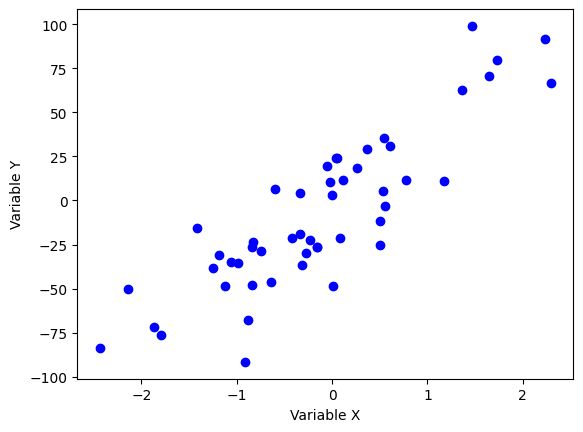

In [1]:
# Importación de librerías
import numpy as np
from numpy import mean, std
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold
import matplotlib.pyplot as plt
%matplotlib inline

# Definición de un dataset con solo 1 feature (1 variable X)
X, y = make_regression(n_samples=50, n_features=1, n_informative=15, noise=20, random_state=2)
plt.scatter(X, y, color = 'blue')   
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.show()

# Se muestra cómo realizar una validación, pero esta vez sin optimizar los parámetros del modelo (GridSearchCV)
# En este caso simplemente se validan los parámetros por defecto con la función RepeatedKFold
# Independientemente, se recomienda siempre que sea posible optimizar los parámetros con GridSearch

Se obtiene el error absoluto medio (MAE): -19.209, desviación 6.270


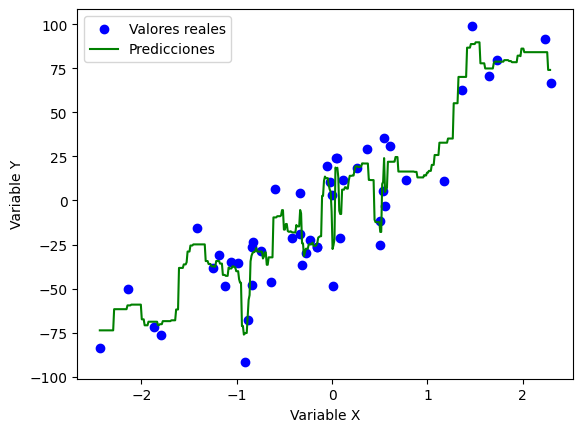

In [4]:
# Definición de un modelo
model = RandomForestRegressor()

# Evaluación del modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# Obtención de una métrica de rendimiento
print('Se obtiene el error absoluto medio (MAE): %.3f, desviación %.3f' % (mean(n_scores), std(n_scores)))

# Ajuste del modelo a los datos
model.fit(X,y)
X_grid = np.arange(min(X), max(X), 0.01)                
X_grid = X_grid.reshape((len(X_grid), 1)) 
y_prediccion = model.predict(X_grid)

# Visualización de los resultados del Random forest regressor
plt.scatter(X, y, color = 'blue', label="Valores reales")   
plt.plot(X_grid, y_prediccion, color = 'green', label="Predicciones")  
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.legend()
plt.show()